### MNIST Dataset
http://yann.lecun.com/exdb/mnist/

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
The MNIST database contains 60,000 training images and 10,000 testing images.
![title](mnist.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
random_state = 42

In [2]:
import time
def timer_start():
    global t0
    t0 = time.time()


def timer_end():
    t1 = time.time()   
    total = t1-t0
    print('Time elapsed', total) 
    return total

### Load Data 
The MNIST data comes pre-loaded with sklearn. The first 60000 images are training data and next 1000 are test data

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']


X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print('Training Shape {} Test Shape {}'.format(X_train.shape, X_test.shape))

Training Shape (60000, 784) Test Shape (10000, 784)


C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### Create a Validation set
In real world ML scenarios we create separate Train, Validation and Test set. We train our model on Training set,  optimize our model using validation set and evalaute on Test set so that we dont induce bias.  Since we already have test set we need to split training set into separate traiining and validation sets. As we will see later that we can do K-fold cross validation which removes the necessaity of creating Validations set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, 
                                                     random_state = random_state, stratify=  y_train )
print('Training Shape {} Validation Shape {}'.format(X_train.shape, X_valid.shape))


Training Shape (48000, 784) Validation Shape (12000, 784)


In [5]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,154,103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,254,254,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,240,254,254,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,109,241,254,254,215,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,254,254,254,214,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,197,254,254,254,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,245,254,254,254,144,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,187,254,254,254,197,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,128,254,254,254,225,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,254,254,254,211,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,121,244,254,254,252

  ### Display Sample Image
 

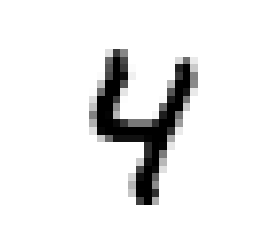

In [6]:
import matplotlib

def display_digit(digit):
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
    plt.axis('off')
    plt.show()
   
    
digit = X_train[92]
display_digit(digit)

 Each Image consist of 28 X 28 pixels with pixel values from 0 to 255. The pixel values represent the greyscale intensity increasing from 0 to 255. As we can see below digit 4 can be represented by pixel intensities of varying values and the region where pixel intensities has high value are assosciated with the image of 4
 

In [7]:
pd.DataFrame(digit.reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,33,196,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,152,254,183,0,0,0,0,0,0,39,145,21,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,171,254,197,4,0,0,0,0,0,220,255,53,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,4,184,254,244,15,0,0,0,0,0,201,254,125,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,62,254,254,175,0,0,0,0,0,72,253,254,117,0,0,0,0,0,0


###  Traget Value Counts

In [8]:
pd.DataFrame(y_train)[0].value_counts()

1.0    5394
7.0    5012
3.0    4905
2.0    4766
9.0    4759
0.0    4738
6.0    4734
8.0    4681
4.0    4674
5.0    4337
Name: 0, dtype: int64

## Train Model Using Gradient Boosted Machine
The training on GBM is extremely slow for dataset this large. It is not feasable to use this for practical purpose hence code is commented. We will use a better alogorithm for boosted trees. For small dataset this still can be used hence code is not deleted 

In [ ]:
# timer_start()
# from sklearn.ensemble import GradientBoostingClassifier
# model  = GradientBoostingClassifier(random_state = random_state,
#                                     verbose = 1)
# model.fit(X_train, y_train) 
# timer_end()

#### Validation Set Accuracy

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_valid)
# test_acc = accuracy_score(y_valid, y_pred)
# print('Validation accuracy', test_acc)

## Train Model Using LightGBM: Default

LightGBM devloped by Microsoft Research Team, is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

<br>Faster training speed and higher efficiency
<br>Lower memory usage
<br>Better accuracy
<br>Parallel and GPU learning supported
<br>Capable of handling large-scale data

https://lightgbm.readthedocs.io/en/latest/

#### Validation set accuracy
The defualt  model gave an impressive accuracy of 97% comapared to 94.5% accuracy of RandomForest

## Train Model Using LightGBM:Tuned with Early Stopping
The Idea behind early stopping is that we train the model for large number of iterations, but stop when the validation score stops improving. This is a powerful mechanism to deal with overfiiting

#### Validation Set Accuracy

#### Test Set Accuracy
The Test Accuracy 98.21% of a tuned LightGBM Model is better than 97.06% of Tuned RandomForest. The increase of 1.2% may not seem much but it means  120 more correct predcition on  test set of 10000 samples.


### Random Incorrect Predictions
Lets display random 10 images in test data which were incorrectly predicted by our model. We can notice some of the images are difficult to identify even for humans

In [14]:
def display_incorrect_preds(y_test, y_pred):
    test_labels = pd.DataFrame()
    test_labels['actual'] = y_test
    test_labels['pred'] = y_pred
    incorrect_pred = test_labels[test_labels['actual'] != test_labels['pred'] ]
    random_incorrect_pred = incorrect_pred.sample(n= 10)

    for i, row in random_incorrect_pred.iterrows():
        print('Actual Value:', row['actual'], 'Predicted Value:', row['pred'])
        display_digit(X_test[i])
        
